# DATA UNDERSTANDING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Read the data
INCIDENTS = '../dataset/data-raw/incidents.csv'
POVERTYYEAY = '../dataset/data-raw/povertyByStateYear.csv'
STATEDISHOUSE = '../dataset/data-raw/year_state_district_house.csv'

incidents = pd.read_csv(INCIDENTS)
poverty = pd.read_csv(POVERTYYEAY)
state_district_house = pd.read_csv(STATEDISHOUSE)


/tmp/ipykernel_3522/3537406991.py:11: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents = pd.read_csv(INCIDENTS)


## First look at the data
### Columns descriptions
#### Incidents DS

| Column name               | Description                                                                                  | Notes                                   |
|---------------------------|----------------------------------------------------------------------------------------------|-----------------------------------------|
| date                      | Date of the incident YYYY-MM-DD                                                              | Split into 3 columns (year, month, day) |
| state                     | State in which the incident occurred                                                         | Converted to UPPER-CASE                 |
| city_or_county            | City or county where the incident occurred                                                   |                                         |
| address                   | Address or location details of the incident                                                   |                                         |
| latitude                  | Latitude coordinate of the incident location                                                 |                                         |
| longitude                 | Longitude coordinate of the incident location                                                |                                         |
| congressional_district    | Congressional district associated with the location                                          |                                         |
| state_house_district      | State House district associated with the location                                            |                                         |
| state_senate_district     | State Senate district associated with the location                                           |                                         |
| participant_age1          | Age of a randomly chosen participant                                                         |                                         |
| participant_age_group1    | Age group of a randomly chosen participant (['Adult 18+' 'Teen 12-17' 'Child 0-11'])                                                 |
| participant_gender1       | Gender of a randomly chosen participant                                                      |                                         |
| min_age_participants      | Minimum age among all participants in the incident                                            |                                         |
| avg_age_participants      | Average age of all participants in the incident                                               |                                         |
| max_age_participants      | Maximum age among all participants in the incident                                            |                                         |
| n_participants_child      | Number of child participants (age 0-11)                                                      |                                         |
| n_participants_teen       | Number of teen participants (age 12-17)                                                       |                                         |
| n_participants_adult      | Number of adult participants (age 18+)                                                        |                                         |
| n_males                   | Number of male participants                                                                   |                                         |
| n_females                 | Number of female participants                                                                 |                                         |
| n_killed                  | Number of individuals killed in the incident                                                  |                                         |
| n_injured                 | Number of individuals injured in the incident                                                 |                                         |
| n_arrested                | Number of individuals arrested in connection with the incident                                |                                         |
| n_unharmed                | Number of individuals unharmed in the incident                                                |                                         |
| n_participants            | Total number of participants in the incident                                                  |                                         |
| notes                     | Additional notes or details about the incident                                                |                                         |
| incident_characteristics1 | Additional characteristics or features of the incident (1st)                                  |                                         |
| incident_characteristics2 | Additional characteristics or features of the incident (2nd)                                  |                                         |


## Show an aggregate description of each column 

In [3]:
for name, df in [('incidents', incidents), ('poverty', poverty), ('state_district_house', state_district_house)]:
    print(f"----- {name} head -----")
    print(tabulate(df.head(), headers='keys', tablefmt='psql') + '\n')
    


----- incidents head -----
+----+------------+----------------------+------------------+------------------------------------+------------+-------------+--------------------------+------------------------+-------------------------+--------------------+--------------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+-----------------------+------------------------+-----------+-------------+------------+-------------+--------------+--------------+------------------+------------------------------------------------------------------------------+-------------------------------------------+--------------------------------------+
|    | date       | state                | city_or_county   | address                            |   latitude |   longitude |   congressional_district |   state_house_district |   state_senate_district |   participant_age1 | participant_age_group1   | participant_gender1   |   min_ag

In [4]:
for name, df in [('incidents', incidents), ('poverty', poverty), ('state_district_house', state_district_house)]:
    print(f"----- {name} non-numeric columns unique values -----\n")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"{col}:\n\tUnique cardinality: {df[col].unique().shape[0]}\n\t{df[col].unique()} + \n")

----- incidents non-numeric columns unique values -----

date:
	Unique cardinality: 2437
	['2015-05-02' '2017-04-03' '2016-11-05' ... '2013-07-24' '2013-12-14'
 '2013-04-18'] + 

state:
	Unique cardinality: 51
	['Indiana' 'Pennsylvania' 'Michigan' 'District of Columbia'
 'North Carolina' 'Louisiana' 'Connecticut' 'Virginia' 'Oklahoma'
 'New York' 'Missouri' 'California' 'Texas' 'Illinois' 'Ohio' 'Washington'
 'Florida' 'South Carolina' 'Georgia' 'Massachusetts' 'Tennessee'
 'West Virginia' 'New Jersey' 'Arkansas' 'Rhode Island' 'Maine' 'Nevada'
 'Colorado' 'New Mexico' 'Maryland' 'Oregon' 'South Dakota' 'Kentucky'
 'Alabama' 'Arizona' 'Minnesota' 'Wisconsin' 'Mississippi' 'Kansas' 'Iowa'
 'Wyoming' 'Nebraska' 'Alaska' 'Utah' 'Montana' 'Hawaii' 'Delaware'
 'Idaho' 'New Hampshire' 'Vermont' 'North Dakota'] + 



city_or_county:
	Unique cardinality: 12898
	['Indianapolis' 'Kane' 'Detroit' ... 'Emporium' 'Conecuh (county)'
 'Somerset County'] + 

address:
	Unique cardinality: 198038
	['Lafayette Road and Pike Plaza' '5647 US 6'
 '6200 Block of East McNichols Road' ... 'Pawling and Plum Avenues'
 'Barron Ave and Pendleton St' '601 Prospect Lake Drive'] + 

participant_age_group1:
	Unique cardinality: 4
	['Adult 18+' nan 'Teen 12-17' 'Child 0-11'] + 

participant_gender1:
	Unique cardinality: 4
	['Male' nan 'Female' 'Male, female'] + 

min_age_participants:
	Unique cardinality: 12674
	['19.0' '62.0' nan ... '109599' '872260' '560583'] + 

avg_age_participants:
	Unique cardinality: 12870
	['19.0' '62.0' nan ... '307569' '586204' 'rac5t'] + 

max_age_participants:
	Unique cardinality: 12853
	['19.0' '62.0' nan ... 'kbrx7b6r' '784934' 'lzgwvzj8uv'] + 

n_participants_child:
	Unique cardinality: 33
	[0.0 nan 1.0 2.0 3.0 835473.0 5.0 4.0 124130.0 436587.0 '0.0' '2.0' '1.0'
 '4.0' '3.0' '6yb1lceu3v' '5.

In [5]:
# Upper case the state column in all dataframes
incidents['state'] = incidents['state'].str.upper()
poverty['state'] = poverty['state'].str.upper()
state_district_house['state'] = state_district_house['state'].str.upper()

#split the date column into year, month, and day and delete the date column
incidents['date_year'] = pd.to_datetime(incidents['date']).dt.year
incidents['date_month'] = pd.to_datetime(incidents['date']).dt.month
incidents['date_day'] = pd.to_datetime(incidents['date']).dt.day
incidents = incidents.drop('date', axis=1)

# reorder columns with date_year, date_month, date_day at the start
cols = list(incidents.columns.values)
cols.pop(cols.index('date_year'))
cols.pop(cols.index('date_month'))
cols.pop(cols.index('date_day'))
incidents = incidents[['date_year', 'date_month', 'date_day'] + cols]

## Here we show a summary of the data in each column for each dataset.
## This is useful to get a first look at the data and to identify possible issues.


In [6]:

for name, df in [('incidents', incidents), ('poverty', poverty), ('state_district_house', state_district_house)]:
    df = df.copy()
    print(f"----- {name} summary -----")
    print(f"records: {df.shape[0]}")
    colsumpd = pd.DataFrame(index=df.columns)
    colsumpd['not_null'] = df.notnull().sum()
    colsumpd['unique'] = df.nunique()
    colsumpd['null_count'] = df.isnull().sum()
    colsumpd['null_perc'] = (colsumpd['null_count'] / df.shape[0] * 100).round(2)
    colsumpd['type'] = (df.dtypes.astype(str)).str.upper()
    numeric_df = df.apply(pd.to_numeric, errors='coerce').describe()
    numeric_df.index = ['numeric_' + str(row) for row in numeric_df.index]
    # round all values of numeric_df to 4 decimal places
    numeric_df = numeric_df.round(4)
    # merge the two dataframes on common columns
    colsumpd = pd.merge(colsumpd, numeric_df.T, left_index=True, right_index=True, how='outer')
    colsumpd['not_num_count'] = colsumpd['not_null'] - colsumpd['numeric_count']
    colsumpd['not_num_perc'] = (colsumpd['not_num_count'] / colsumpd['not_null'] * 100).round(2)
    print(tabulate(colsumpd.T, headers='keys', tablefmt='pipe', numalign='left', stralign='left'))

----- incidents summary -----
records: 239677
|               | date_year   | date_month   | date_day   | state    | city_or_county   | address   | latitude   | longitude   | congressional_district   | state_house_district   | state_senate_district   | participant_age1   | participant_age_group1   | participant_gender1   | min_age_participants   | avg_age_participants   | max_age_participants   | n_participants_child   | n_participants_teen   | n_participants_adult   | n_males   | n_females   | n_killed   | n_injured   | n_arrested   | n_unharmed   | n_participants   | notes          | incident_characteristics1   | incident_characteristics2   |
|:--------------|:------------|:-------------|:-----------|:---------|:-----------------|:----------|:-----------|:------------|:-------------------------|:-----------------------|:------------------------|:-------------------|:-------------------------|:----------------------|:-----------------------|:-----------------------|:------------------

# Results
### incidents dataframe

1. NAN analysis
    - Most columns are `poisoned` with NANs
    - The worst columns are `(min|avg|max)_age_participants`, with +30% of NANs
2. Types analysis
    - `(min|avg|max)_age_participants` and `n_participants_(child|teen|adult)` are classified as `object` but they should have a numeric dtype. This suggests a mix of types
    - `(min|avg|max)_age_participants` have roughly 3.5% of non-numeric non-NAN values. This values are not convertible to numeric.
3. Range analysis
    - `date_year` max value is in the future.
    - The min-max values of the columns `[participant_age1, (min|avg|max)_age_participants, n_participants_(child|teen|adult)]` are beyond the expected ranges.

### poverty / state_district_house dataframes

This dataframes do not raise any red flags on this preliminary analysis.

## ---------------------------------------------------------------

## Columns Filtering
Select which columns to keep for the analysis
### Incidents
We keep `['date', 'state', 'city_or_county', 'latitude', 'longitude', 'congressional_district', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', 'incident_characteristics1']`
### Poverty
We keep everything
### State District House
We keep everything

In [7]:
fincidents = incidents[['date_year', 'date_month', 'date_day', 'state', 'city_or_county', 'latitude', 'longitude', 'congressional_district', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', 'incident_characteristics1']].copy()
print(f"Total number of rows: {fincidents.shape[0]}")
fincidents = fincidents[fincidents['n_participants'] != 0]
print(f"Number of rows with zero participants removed: {fincidents.shape[0]}")

na_counts = fincidents.isna().sum(axis=1)

print(f"nan percentages:\n{na_counts.value_counts().sort_index() / fincidents.shape[0] * 100}")

print(f"Number of rows with more than 6 nan values: {fincidents[(na_counts > 6)].shape[0]}")

Total number of rows: 239677
Number of rows with zero participants removed: 214814
nan percentages:
0     84.764494
1      1.437057
2      2.443975
3      7.568874
4      0.114518
5      2.872718
6      0.188070
7      0.522312
8      0.085190
10     0.002793
Name: count, dtype: float64
Number of rows with more than 6 nan values: 1311


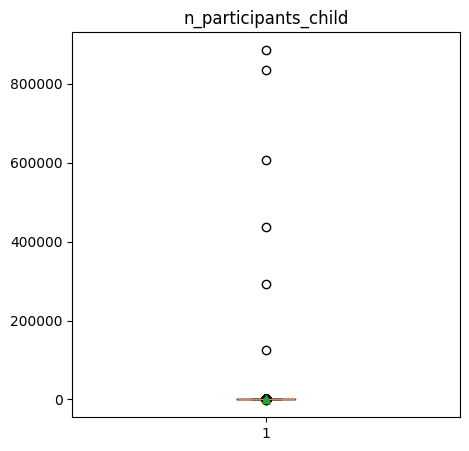

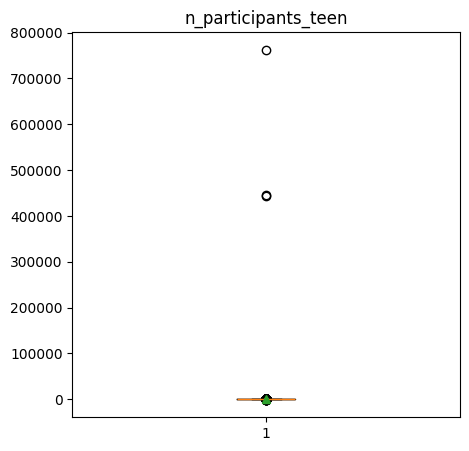

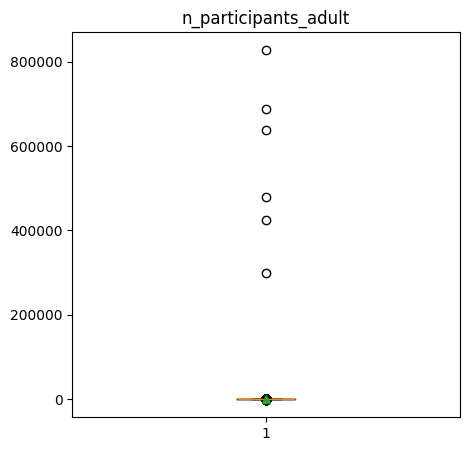

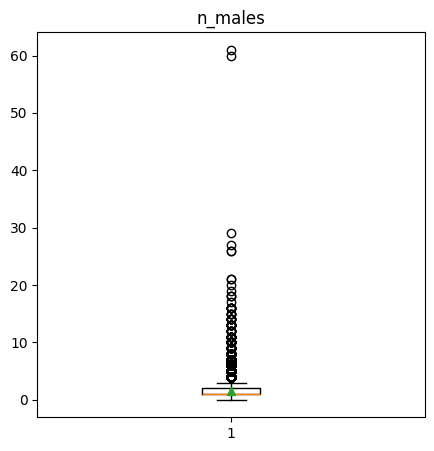

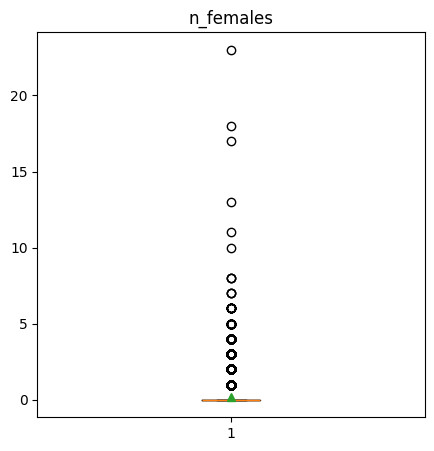

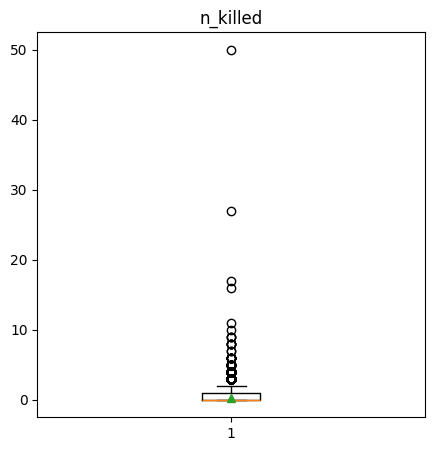

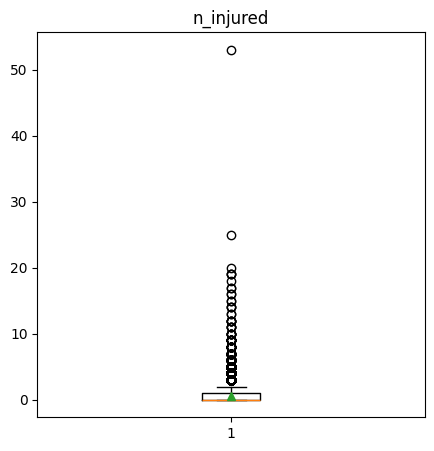

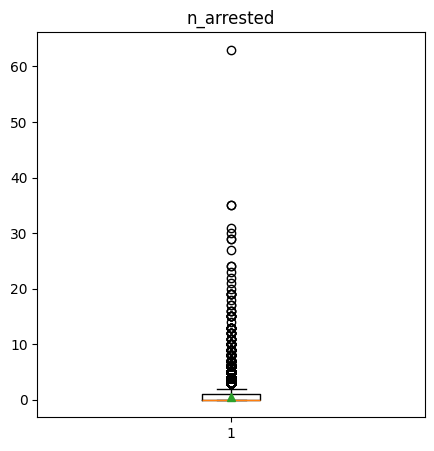

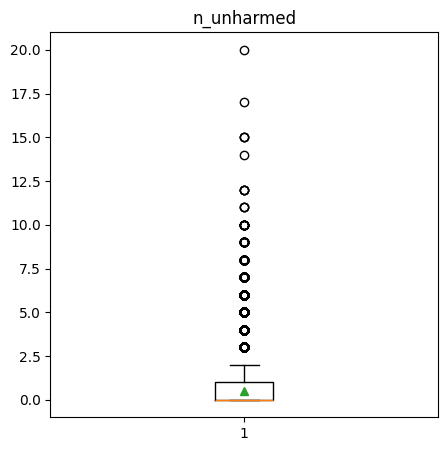

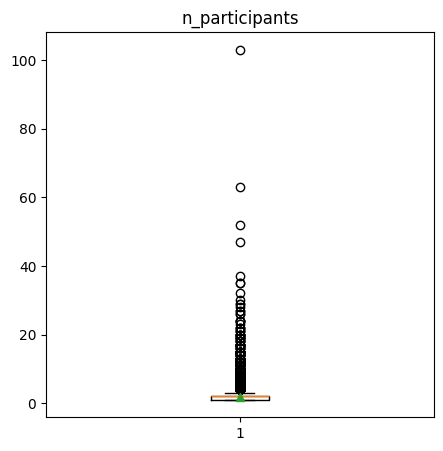

In [8]:
#Let's visualize the distribution of the number of participants
# We will soon see that the distribution is highly skewed due to a lot of outliers

for col in ['n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']:
    tmpcol = fincidents[col].copy()
    # remove non-numeric values
    tmpcol = tmpcol.apply(pd.to_numeric, errors='coerce')
    plt.figure(figsize=(5, 5))
    plt.title(col)
    plt.boxplot(tmpcol[~tmpcol.isna()], showmeans=True)
    plt.show()

In [9]:
# Rows with zero participants, which we will consider as errors
das = incidents[incidents['n_participants'] == 0]
print(f"Number of rows with zero participants: {das.shape[0]}")


Number of rows with zero participants: 24863


# ---------------------------------------------------------------------------------------------------------------------------------

In [10]:
wrong_years = fincidents['date_year'] > 2018
wrong_years.sum()


23031

In [11]:
def age2int(age):
    try:
        if age == np.nan:
            return np.nan
        age = float(age)
        if age == None:
            return np.nan
        if age > 0 and age < 100:
            return age
        return np.nan
    except Exception:
        return np.nan
    
def n_parts2int(parts):
    try:
        if parts == np.nan:
            return np.nan
        parts = float(parts)
        if parts < 0:
            return np.nan
        return parts
    except:
        return np.nan

numeric_incidents = pd.DataFrame()
numeric_incidents['date_year'] = incidents['date_year']
numeric_incidents['date_month'] = incidents['date_month']
numeric_incidents['date_day'] = incidents['date_day']
numeric_incidents['latitude'] = incidents['latitude']
numeric_incidents['longitude'] = incidents['longitude']
numeric_incidents['participant_age1'] = incidents['participant_age1']
numeric_incidents['participant_gender_1'] = incidents['participant_gender1'].map(lambda x: 0 if x == 'Male' else 1 if x == 'Female' else np.nan)
numeric_incidents['min_age_participants'] = incidents['min_age_participants'].map(age2int)
numeric_incidents['avg_age_participants'] = incidents['avg_age_participants'].map(age2int)
numeric_incidents['max_age_participants'] = incidents['max_age_participants'].map(age2int)
numeric_incidents['n_participants_child'] = incidents['n_participants_child'].map(n_parts2int)
numeric_incidents['n_participants_teen'] = incidents['n_participants_teen'].map(n_parts2int)
numeric_incidents['n_participants_adult'] = incidents['n_participants_adult'].map(n_parts2int)
numeric_incidents['n_males'] = incidents['n_males']
numeric_incidents['n_females'] = incidents['n_females']
numeric_incidents['n_killed'] = incidents['n_killed']
numeric_incidents['n_injured'] = incidents['n_injured']
numeric_incidents['n_arrested'] = incidents['n_arrested']
numeric_incidents['n_unharmed'] = incidents['n_unharmed']
numeric_incidents['n_participants'] = incidents['n_participants']
state_district_house['congressional_district'] = state_district_house['congressional_district'].astype('float64')
numeric_incidents = incidents.merge(poverty, how='left', left_on=['state', 'date_year'], right_on=['state', 'year'])
incidents = incidents[incidents['date_year'] < 2018]
incidents['date_year_district'] = incidents['date_year'].map(lambda x: x // 2 * 2)
incidents = incidents.merge(state_district_house, how='left', left_on=['state', 'congressional_district', 'date_year_district'], right_on=['state', 'congressional_district', 'year'])


In [12]:
incidents.info()
incidents.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202844 entries, 0 to 202843
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_year                  202844 non-null  int32  
 1   date_month                 202844 non-null  int32  
 2   date_day                   202844 non-null  int32  
 3   state                      202844 non-null  object 
 4   city_or_county             202844 non-null  object 
 5   address                    188713 non-null  object 
 6   latitude                   196522 non-null  float64
 7   longitude                  196522 non-null  float64
 8   congressional_district     194373 non-null  float64
 9   state_house_district       170480 non-null  float64
 10  state_senate_district      176538 non-null  float64
 11  participant_age1           138754 non-null  float64
 12  participant_age_group1     163696 non-null  object 
 13  participant_gender1        16

,date_year,date_month,date_day,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,date_year_district,year,candidatevotes,totalvotes
count,202844.000000,202844.000000,202844.000000,196522.000000,196522.000000,194373.000000,170480.000000,176538.000000,138754.000000,168904.000000,168904.000000,202844.000000,202844.000000,176990.000000,176990.000000,202844.000000,202844.000000,187741.000000,187741.000000,187741.000000
mean,2015.706858,6.659743,15.773249,37.650145,-89.345354,7.913064,54.864119,20.505268,30.275452,1.531734,0.217561,0.266560,0.490766,0.506305,0.444878,1.620359,2015.182298,2015.155326,165744.844877,246254.514384
std,1.091599,3.387273,8.844520,5.144185,14.362888,8.381078,41.463360,14.276627,13.375841,1.003549,0.498034,0.534495,0.736879,0.872851,0.878938,1.268717,0.988307,0.993072,56852.107428,81444.677416
min,2013.000000,1.000000,1.000000,19.111400,-171.429000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,2012.000000,0.000000,0.000000
25%,2015.000000,4.000000,8.000000,33.958700,-94.160450,2.000000,21.000000,9.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,2014.000000,124779.000000,182278.000000
50%,2016.000000,7.000000,16.000000,38.665900,-86.412600,5.000000,46.000000,19.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,2016.000000,168692.000000,253901.000000
75%,2017.000000,10.000000,23.000000,41.514425,-80.037800,10.000000,84.000000,30.000000,36.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2016.000000,2016.000000,207483.000000,310567.000000
max,2017.000000,12.000000,31.000000,71.336800,90.370000,53.000000,901.000000,94.000000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000,2016.000000,2016.000000,322514.000000,507831.000000


# Date Check

check to see if any dates strings do not follow date rules (2023-13-41) 
- no erroneous dates found

In [13]:

print(f"min date_month: {numeric_incidents['date_month'].min()}")
print(f"max date_month: {numeric_incidents['date_month'].max()}")
print(f"min date_day: {numeric_incidents['date_day'].min()}")
print(f"max date_day: {numeric_incidents['date_day'].max()}")



min date_month: 1
max date_month: 12
min date_day: 1
max date_day: 31


# States Check

No errors found in state names
- Washington DC is not a state, but is included in the data
    - We will remove this data from the analysis due to the low number of incidents in this area

# Latitude and Longitude Check
All values are in range
- latitudes are between -90 and 90
- longitudes are between -180 and 180

In [14]:
#count the number of rows with invalid latitude and longitude
incidents[((incidents['latitude'] < -90) + (incidents['latitude'] > 90) + (incidents['longitude'] < -180) + (incidents['longitude'] > 180))].shape[0]

0

# Participant Age Check

A couple of erroneous values found [311, 209]

179277    311.0
144479    209.0
Name: participant_age1, dtype: float64


(20921, 35)

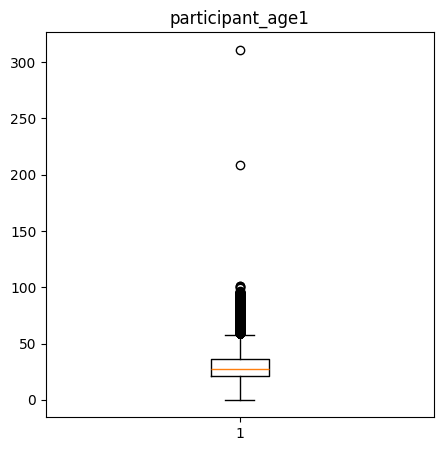

In [15]:
a = incidents['participant_age1'].sort_values(ascending=False)
print(a[:2])
plt.figure(figsize=(5, 5))
plt.title('participant_age1')

plt.boxplot(a.dropna())



incidents['min_age_participants']

def isFloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def inRange(value):
    if value < 0 or value > 110:
        return False
    return True

def isAgeValid(value):
    if isFloat(value):
        if inRange(float(value)):
            return True
    return False

incidents[(incidents['min_age_participants'].apply(isAgeValid) == False) + (incidents['avg_age_participants'].apply(isAgeValid) == False) + (incidents['max_age_participants'].apply(isAgeValid) == False)].shape

### Below we show the correlation matrix for our data.

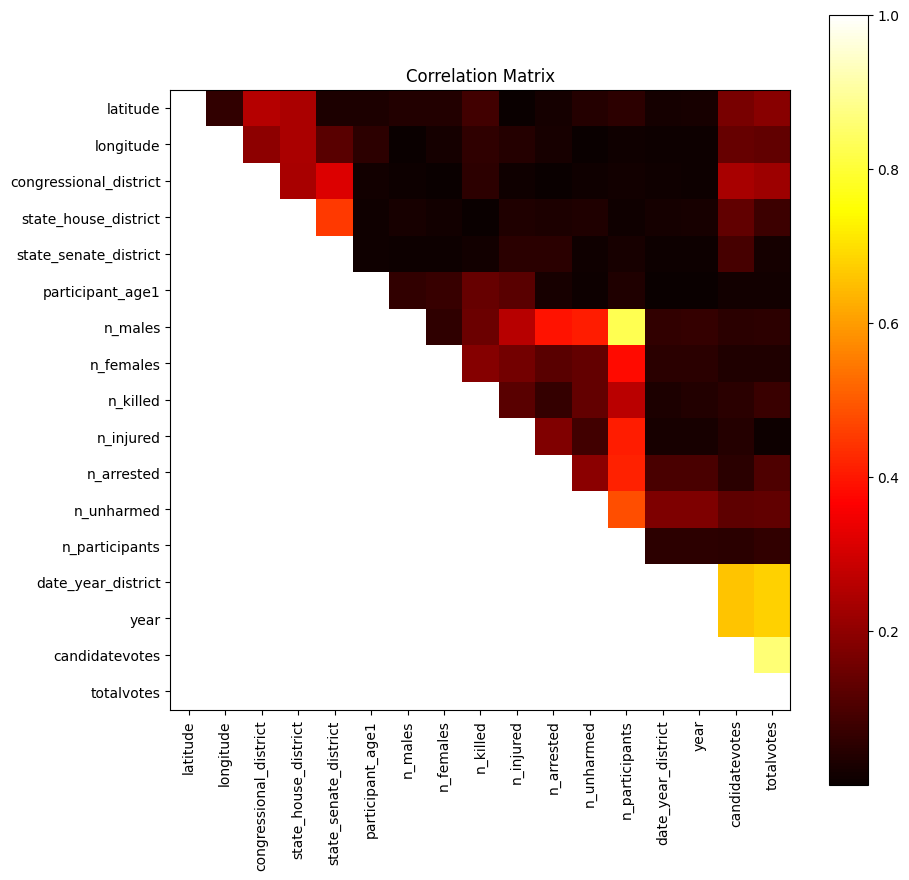

In [16]:
#take only the numeric columns
numeric_incidents = incidents.select_dtypes(include=['float64', 'int64']).copy()

#correlation matrix upper triangle 
corr_matrix = numeric_incidents.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#show the matrix
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix')
plt.imshow(upper, cmap='hot')
#add the colorbar legend and the labels

plt.xticks(range(len(upper.columns)), upper.columns, rotation=90)
plt.yticks(range(len(upper.columns)), upper.columns)


plt.colorbar()
plt.show()

